## This Notebook is about Topic Modelling in Python Where I download subreddit data on Electric Vehicles from TeslaMotors, ElectricVehicles, Rivian, etc and compile the data run stopwords remover, lowercasing, vectorising, punctuation removal and then analysing topic using a popular method Latent Dirichlet Allocation (LDA)

In [ ]:
# Import Python Packages
from google.colab import drive
drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


In [ ]:
import pandas as pd
rev = pd.read_csv(r'/drive/Shareddrives/MSBA Team C9 Projects/CIS509 project/NLP_Project/Milestone 2/evandtesla.csv')
rev.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Loading gensim and nltk libraries

In [ ]:
import nltk
nltk.download('stopwords')
# from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install pyLDAvis
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()


In [ ]:
# import required packages
import json
import spacy
import numpy as np

In [ ]:
stopwords = nlp.Defaults.stop_words
print(stopwords)

{'although', 'many', 'most', 'because', 'do', 'first', 'is', 'using', 'when', 'yours', 'that', 'afterwards', 'thereupon', 'nor', 'on', 'might', 'several', 'something', 'whereby', 'or', 'ourselves', 'becomes', 'becoming', 'between', "'m", 'how', 'quite', 'therein', 'few', 'someone', 'anywhere', 'him', 'their', 'down', 'twenty', 'them', '‘s', 'you', 'without', 'though', 'not', 'everywhere', 'amount', 'least', '’d', 'seemed', 'should', 'sixty', 'upon', 'ca', 'another', 'somewhere', 'eleven', 'could', 'only', 'there', 'here', 'anyway', 'beforehand', 'well', '’ve', 'wherein', 'whereupon', 'those', 'n’t', 'beside', 'everyone', 'some', 'more', '‘m', 'behind', 'sometime', 'whither', 'before', 'yourself', 'side', 'be', 'enough', 'has', 'noone', 'his', 'ten', 'doing', 'see', 'every', 'too', 'seem', 'whoever', 'thereafter', 'latter', 'meanwhile', 'fifteen', 'really', 'two', 'which', 'alone', 'already', 'eight', 'next', 'else', 'even', 'therefore', '’re', 'onto', 'throughout', 'after', 'less', 'na

In [ ]:
# variables to store term statistics
num_of_comments = 0
unique_word = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique words
num_of_token_per_comment = [] # using the list-type varailbe since we want to measure corpus-level statistics (e.g., avg, max, min, median, etc.)
num_of_token_per_comment_without_stop_words = []
total_number_of_tokens = 0 # in a corpus
unique_author = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique authors
time_stamp_list = [] # able to measure the number of comments by day, week, etc.
reply_count = 0
unique_submission = set()# using the

##The Code Section below contains Term Statistics Information

In [ ]:
x = pd.read_csv("/gdrive/MyDrive/Arizona State University/CIS_509/evandtesla.csv") #main file with all comments included beyond this point for Statistical evaluation

In [ ]:
x = x[x.msgBody!='[deleted]']

In [ ]:
x = x[x.msgBody!='[deleted]']
x = x.astype({"msgBody": str}, errors='raise') 
x.dropna(inplace=True)
x['msgBody']= x['msgBody'].astype(str)

In [ ]:
x.head()

,commentID,timestamp,author,threadID,threadTitle,msgBody,replyTo,permalink
5,'i1cltax','2022-03-20 01:00:22','Kev56','ti6zzv','New Houston Tesla Service Center','TE','-','/r/teslamotors/comments/ti6zzv/new_houston_te...
6,'i1cuwfa','2022-03-20 02:17:32','Beelzabub','ti6zzv','New Houston Tesla Service Center','What about a facility further south? Theres ...,'-','/r/teslamotors/comments/ti6zzv/new_houston_te...
7,'i1d32jb','2022-03-20 03:30:00','040dev','ti6zzv','New Houston Tesla Service Center','That used to be a Gander Mountain and sat vac...,'-','/r/teslamotors/comments/ti6zzv/new_houston_te...
8,'i1dbrrj','2022-03-20 04:56:17','justinsidebieber','ti6zzv','New Houston Tesla Service Center','we need one further south like MO city or Ric...,'-','/r/teslamotors/comments/ti6zzv/new_houston_te...
9,'i1d6acp','2022-03-20 04:00:20','mhornberger','ti6zzv','New Houston Tesla Service Center','Theyre also putting in chargers at the H-E-B ...,'-','/r/teslamotors/comments/ti6zzv/new_houston_te...


In [ ]:
x = x.astype({"msgBody": str}, errors='raise') 
x.dropna(inplace=True)

In [ ]:
x.isna().sum()


commentID      0
timestamp      0
author         0
threadID       0
threadTitle    0
msgBody        0
replyTo        0
permalink      0
dtype: int64

In [ ]:

x['msgBody']= x['msgBody'].astype(str)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15717 entries, 5 to 16157
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   commentID    15717 non-null  object
 1   timestamp    15717 non-null  object
 2   author       15717 non-null  object
 3   threadID     15717 non-null  object
 4   threadTitle  15717 non-null  object
 5   msgBody      15717 non-null  object
 6   replyTo      15717 non-null  object
 7   permalink    15717 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


In [ ]:
# x= x[:1000]

In [ ]:
x.shape

(15717, 8)

#Data Pre-processing
##We will perform the following steps:
###Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
####Words that have fewer than certain characters are removed.
###A ll stopwords are removed.
###Words are lemmatized — words in third person are changed to first person and ### verbs in past and future tenses are changed into present.
### Words are stemmed — words are reduced to their root form.

In [ ]:
nlp = spacy.load('en_core_web_lg')
for index, line_data in x.iterrows(): # for each data point, do the following
    text = line_data["msgBody"]
    doc = nlp(text)
    num_of_comments += 1
    # statistics regarding words
    num_of_tokens = len(doc)
    total_number_of_tokens += num_of_tokens
    token_count_without_stop_words = 0
    for token in doc:
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        else:
            unique_word.add(str(token).lower())
            token_count_without_stop_words += 1
    num_of_token_per_comment.append(num_of_tokens)
    num_of_token_per_comment_without_stop_words.append(token_count_without_stop_words)
    # statistics regarding authors
    author_name = line_data["author"]
    unique_author.add(author_name.lower())
    # statistics regarding time_stamp
    time_stamp = line_data["timestamp"]
    time_stamp_list.append(time_stamp)
    # statistics regarding replies
    reply_to = line_data["replyTo"]
    if reply_to == "-":
        pass
    else:
        reply_count += 1
    # statistics regarding submissions
    thread_id = line_data["threadID"]
    unique_submission.add(thread_id)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

In [ ]:
# statistics
print("number of comments:", num_of_comments)
print("number of unique words:", len(unique_word))
print("total number of words in the corpus:", total_number_of_tokens)
print("average number of words in comments:", np.mean(np.asarray(num_of_token_per_comment)))
print("average number of words in comments without stop words:", np.mean(np.asarray(num_of_token_per_comment_without_stop_words)))
print("maximum number of words in comments:", np.max(np.asarray(num_of_token_per_comment)))
print("maximum number of words in comments without stop words:", np.max(np.asarray(num_of_token_per_comment_without_stop_words)))
print("minimum number of words in comments:", np.min(np.asarray(num_of_token_per_comment)))
print("minimum number of words in comments without stop words:", np.min(np.asarray(num_of_token_per_comment_without_stop_words)))
print("median number of words in comments:", np.median(np.asarray(num_of_token_per_comment)))
print("median number of words in comments without stop words:", np.median(np.asarray(num_of_token_per_comment_without_stop_words)))
print("number of unique authors:", len(unique_author))
print("number of comments replying to other comments:", reply_count)
print("number of sumbissions:", len(unique_submission))

number of comments: 15717
number of unique words: 22277
total number of words in the corpus: 728280
average number of words in comments: 46.33708723038748
average number of words in comments without stop words: 25.13609467455621
maximum number of words in comments: 2028
maximum number of words in comments without stop words: 1007
minimum number of words in comments: 3
minimum number of words in comments without stop words: 2
median number of words in comments: 29.0
median number of words in comments without stop words: 16.0
number of unique authors: 4666
number of comments replying to other comments: 15717
number of sumbissions: 469


### Now Coming to LDA - Topic Modelling from Comments data which in our case is in the msgBody Column

In [ ]:
#importing all necessary libraries for this task
import nltk
import string
import re
import pandas as pd
nltk.download('stopwords')
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
from nltk.corpus import stopwords
stop = stop_words

y = pd.read_csv("/gdrive/MyDrive/Arizona State University/CIS_509/evandtesla.csv") #the main file with all combined comments should pass beyond this point

y = y[y.msgBody!='[deleted]']
y = y.astype({"msgBody": str}, errors='raise') 
y.dropna(inplace=True)
y['msgBody']= y['msgBody'].astype(str)
# #first round of stopword removal
y['tweet_without_stopwords'] = y['msgBody'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#setting all lower case
y['tweet_without_stopwords'] =[file.lower() for file in y['tweet_without_stopwords']]


In [ ]:
#defining our own function to remove punctuations:

def remove_punct(list_of_text):
    
    no_punct = []
    
    for index, file in enumerate(list_of_text):
        file = (
            file.translate(
                str.maketrans('', '', string.punctuation)
            )
        )

        no_punct.append(file)
    return no_punct

#removing the actual punctuations from our target column

y['tweet_without_stopwords'] = remove_punct(y['tweet_without_stopwords'])

In [ ]:
y.head()

,commentID,timestamp,author,threadID,threadTitle,msgBody,replyTo,permalink,tweet_without_stopwords
5,'i1cltax','2022-03-20 01:00:22','Kev56','ti6zzv','New Houston Tesla Service Center','TE','-','/r/teslamotors/comments/ti6zzv/new_houston_te...,te
6,'i1cuwfa','2022-03-20 02:17:32','Beelzabub','ti6zzv','New Houston Tesla Service Center','What about a facility further south? Theres ...,'-','/r/teslamotors/comments/ti6zzv/new_houston_te...,what facility south theres already place 45
7,'i1d32jb','2022-03-20 03:30:00','040dev','ti6zzv','New Houston Tesla Service Center','That used to be a Gander Mountain and sat vac...,'-','/r/teslamotors/comments/ti6zzv/new_houston_te...,that used gander mountain sat vacant years
8,'i1dbrrj','2022-03-20 04:56:17','justinsidebieber','ti6zzv','New Houston Tesla Service Center','we need one further south like MO city or Ric...,'-','/r/teslamotors/comments/ti6zzv/new_houston_te...,we need one south like mo city richmond superc...
9,'i1d6acp','2022-03-20 04:00:20','mhornberger','ti6zzv','New Houston Tesla Service Center','Theyre also putting in chargers at the H-E-B ...,'-','/r/teslamotors/comments/ti6zzv/new_houston_te...,theyre also putting chargers heb supermarket 1...


In [ ]:
y.shape

(15717, 9)

In [ ]:
y.isna().sum()

commentID                  0
timestamp                  0
author                     0
threadID                   0
threadTitle                0
msgBody                    0
replyTo                    0
permalink                  0
tweet_without_stopwords    0
dtype: int64

In [ ]:
#necessary libraries to import for removing stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
stop_words[1:10]


['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#defining out own function to remove stop words 

def remove_stop_words(tokenized_text):
    # Retrieve Stop Words
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
    
    list_files_no_stop = []
    
    for file in tokenized_text:
        no_stop_words = []
        for word in file:
            if word not in stop_words:
                no_stop_words.append(word)
        
        list_files_no_stop.append(
            no_stop_words
        )
        
    return list_files_no_stop

In [ ]:
#tokenise the comments
from nltk.tokenize import word_tokenize
nltk.download('punkt')
y['tweet_without_stopwords'] = [word_tokenize(file) for file in y['tweet_without_stopwords']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
y['tweet_without_stopwords'] = remove_stop_words(y['tweet_without_stopwords'])

In [ ]:
processed_documents=y['tweet_without_stopwords']
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [ ]:
y['tweet_without_stopwords']

5                                                     [te]
6            [facility, south, theres, already, place, 45]
7             [used, gander, mountain, sat, vacant, years]
8        [need, one, south, like, mo, city, richmond, s...
9        [theyre, also, putting, chargers, heb, superma...
                               ...                        
16153    [25, really, tesla, draws, like, 20, kwh100km,...
16154    [thats, true, us, look, every, automotive, pla...
16155                      [confused, trying, articulated]
16156    [wonder, mcs, ready, time, market, though, ive...
16157                              [’, great, perspective]
Name: tweet_without_stopwords, Length: 15717, dtype: object

##This is our LDA Model

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=9) # train LDA model

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

### show 5 most important words for each topic, we set the number of topics as 9 based on Coherence graph as below as we don't want to exceed the number of topics above 10

##Running LDA using Bag of Words
##Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [ ]:
for topic in lda_model.show_topics(num_topics=9, num_words=5):
    print(topic)
    print(corpus_tfidf[0],end=' \n\n')

(0, '0.006*"’" + 0.005*"tesla" + 0.004*"ev" + 0.004*"car" + 0.004*"like"')
[(0, 1.0)] 

(1, '0.005*"yes" + 0.004*"america" + 0.003*"’" + 0.003*"chargepoint" + 0.003*"ev"')
[(0, 1.0)] 

(2, '0.019*"deleted" + 0.005*"congrats" + 0.005*"ea" + 0.003*"fan" + 0.003*"unit"')
[(0, 1.0)] 

(3, '0.010*"ev6" + 0.006*"kia" + 0.005*"nice" + 0.005*"e" + 0.004*"ioniq"')
[(0, 1.0)] 

(4, '0.005*"bolt" + 0.005*"’" + 0.004*"charge" + 0.004*"charging" + 0.004*"lol"')
[(0, 1.0)] 

(5, '0.008*"hyundai" + 0.005*"toyota" + 0.004*"coal" + 0.004*"engine" + 0.003*"ix"')
[(0, 1.0)] 

(6, '0.005*"leaf" + 0.005*"’" + 0.004*"tax" + 0.004*"bev" + 0.003*"ev"')
[(0, 1.0)] 

(7, '0.009*"id4" + 0.005*"oil" + 0.004*"audi" + 0.004*"eqs" + 0.004*"capacity"')
[(0, 1.0)] 

(8, '0.006*"’" + 0.004*"thanks" + 0.004*"ev" + 0.003*"tesla" + 0.003*"dont"')
[(0, 1.0)] 



In [ ]:
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
# for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
#     print(doc, ": ", topic_dist)
#     break

(0, 0.055555563)
(1, 0.05555557)
(2, 0.05555558)
(3, 0.05555557)
(4, 0.055555563)
(5, 0.055555582)
(6, 0.5555554)
(7, 0.05555557)
(8, 0.055555567)


## This the the LDA Visualisation which is to be used for the report 

In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


##Testing the coherence measures with Plots

In [ ]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.49801839030812467


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

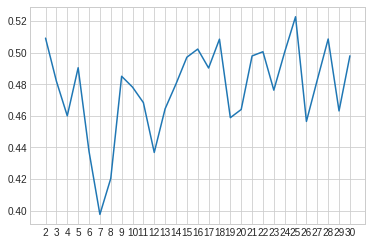

<Figure size 432x216 with 0 Axes>

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.figure(figsize=(6, 3))
plt.show()
